In [3]:
#import os
#cwd = os.getcwd()
#import sys
#sys.path.append(cwd)

#Jupyter notebook has to be opened from the mortgages directory
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import requests
import io
import datetime
from data_processor import *


In [30]:

#Input Parameters

#Loan contract date (year,month and day) (date loan is signed)
loan_year=1995
loan_month=5
loan_day=1

#Loan repayment period in months
loan_maturity_m=360

#Amount of th loan
loan_amount=50000


#Fixed interest rate period in months
interest_fixed_period=5*12

#Fixed interest rate in %
#interest_fixed_pc=4.2
interest_fixed_pc=3.3
#Basis Variable interest rate in % (this is the base and additiona interest is added, like EURIBOR)
#interest_var_base_pc=5.7+3.311
interest_var_base_pc=8


#Variable interest period
interest_var_period=loan_maturity_m-interest_fixed_period


interest_fixed=interest_fixed_pc/100
interest_var_base=interest_var_base_pc/100



In [31]:
#Analysing repayments

# List with payment months
time_m=np.arange(1,loan_maturity_m+1,1)

#Principal repayment per month
principal_payment_m=np.full(loan_maturity_m,loan_amount/loan_maturity_m)

#Outstanding principal per month; flip reverses the order
principal_comm_m= np.flip(np.cumsum(principal_payment_m))


#Periods of fixed and variable interest rates
interest_rate_fixed_m=np.full(interest_fixed_period,interest_fixed)
interest_rate_var_m=np.full(interest_var_period,interest_var_base)

#Interest rate per month
interest_rate_m=np.concatenate((interest_rate_fixed_m,interest_rate_var_m),axis=0)

#--------------------------------------------------------------------------------------

#Monthly interest payment. Outstending ammount * annual interest / 12
#Separate lists for fixed interest period and variable interest period
interest_payment_fixed_m=np.multiply(principal_comm_m[0:interest_fixed_period],interest_rate_fixed_m)/12
interest_payment_var_m=np.multiply(principal_comm_m[interest_fixed_period:],interest_rate_var_m)/12

#Monthly interest payment, where interest of the fixed period is equailly ditributed over the fixed period
#Same as interest_payment_fixed_m but montly interest is constant throughout (total interest / number of fixed interest months)
interest_payment_fixed_flat_m=np.full(interest_fixed_period,np.sum(interest_payment_fixed_m)/interest_fixed_period)


interest_payment_m=np.concatenate((interest_payment_fixed_m,interest_payment_var_m),axis=0)
interest_payment_flat_m=np.concatenate((interest_payment_fixed_flat_m,interest_payment_var_m),axis=0)

# Total monthly payment
total_payment_m=principal_payment_m+interest_payment_m
total_payment_flat_m=principal_payment_m+interest_payment_flat_m

#Cummulative amount of payed interests (how much interest has been payed by a given month)
interest_repayd_m=np.cumsum(interest_payment_m)
interest_repayd_flat_m=np.cumsum(interest_payment_flat_m)

([<matplotlib.axis.XTick at 0x7f6b75640c70>,
 [Text(0, 0, '0'),
  Text(60, 0, '5'),
  Text(120, 0, '10'),
  Text(180, 0, '15'),
  Text(240, 0, '20'),
  Text(300, 0, '25'),
  Text(360, 0, '30')])

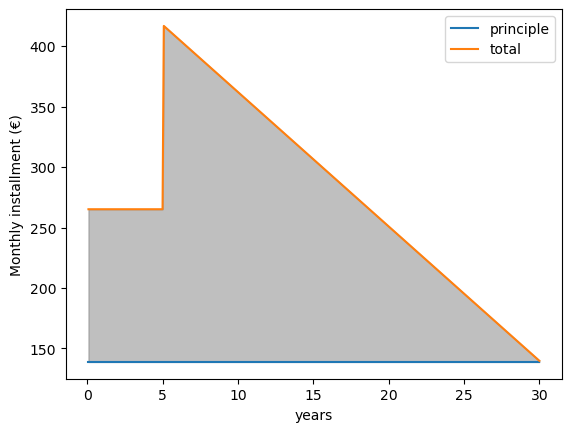

In [32]:
plt.plot(time_m,principal_payment_m,label='principle')
#plt.plot(time_m,interest_payment_m,label='interest')
#plt.plot(time_m,total_payment_m,label='linear')
plt.plot(time_m,total_payment_flat_m,label='total')
plt.fill_between(time_m,total_payment_flat_m,principal_payment_m,color='gray',alpha=0.5)
plt.legend()
#plt.xlabel('Mesec')
#plt.ylabel('Mesecna rata (MKD)')
plt.ylabel('Monthly installment (\N{euro sign})')
#plt.xlabel('godina')

plt.xlabel('years')
plt.xticks(np.arange(0,loan_maturity_m+1,5*12),np.arange(0,loan_maturity_m/(5*12)+1,dtype=int)*5)
#plt.savefig('card_1y.png')

In [33]:
total_payment_flat_m.max()- total_payment_flat_m[1]

151.54513888888977

In [27]:
total_payment_flat_m.max()


577.7777777777761

In [28]:
np.sum(interest_payment_fixed_m)

22036.66666666652

In [29]:
(loan_amount/loan_maturity_m) *interest_fixed_period

26666.666666666668

In [13]:
#Euribor 1-year

# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='FM'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '1995-01-01',  # Start date of the time series
    #'endPeriod': '2018-10-01'     # End of the time series
    'endPeriod': '2023-01-01'     # End of the time series
}
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key

Successfully retrieved data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1995-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OBS_VALUE  336 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


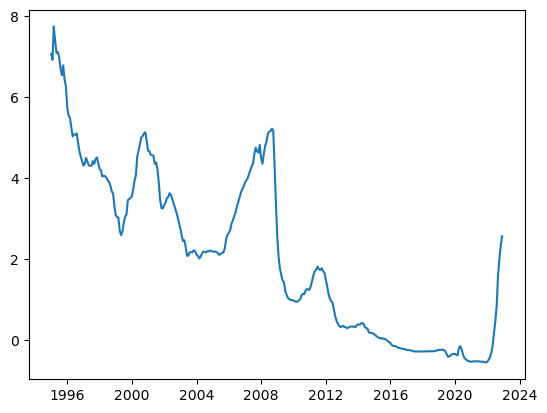

In [19]:
dft=df_time_ecb(request_url,parameters,1)

dft.info()

plt.plot(dft)
plt.show()

In [41]:
ECBkeys= {
    'euribor1m' : 'FM/M.U2.EUR.RT.MM.EURIBOR1MD_.HSTA',
    'euribor3m' : 'FM/M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA',
    'euribor6m' : 'FM/M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA',
    'euribor1y' : 'FM/M.U2.EUR.RT.MM.EURIBOR1YD_.HSTA'
}

if 'euribor1y' in ECBkeys.keys():
    print(ECBkeys['euribor1y'])

FM/M.U2.EUR.RT.MM.EURIBOR1YD_.HSTA


Successfully retrieved data
Successfully retrieved data


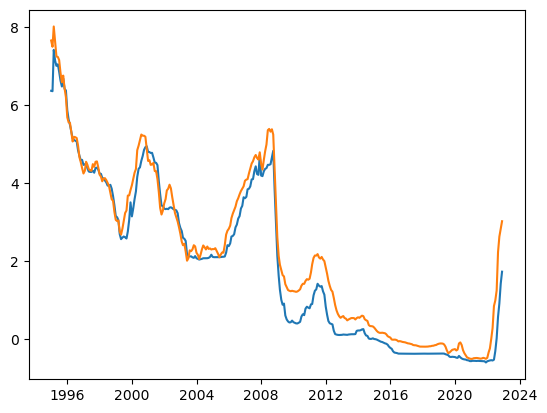

In [21]:
plt.plot(df_time_ecb( entrypoint + resource + '/'+ ECBkeys['euribor1m'],parameters,1))
plt.plot(df_time_ecb( entrypoint + resource + '/'+ ECBkeys['euribor1y'],parameters,1))
plt.show()

In [44]:
dftest=df_time_ecb( entrypoint + resource + '/'+ ECBkeys['euribor1y'],parameters,tindex=1)
#dftest=df_time_ecb( 'euribor1y',parameters,tindex=1)


Successfully retrieved data


In [45]:
dftest.head()


,OBS_VALUE
TIME_PERIOD,
1995-05-01,7.25
1995-06-01,7.24
1995-07-01,7.16
1995-08-01,6.83
1995-09-01,6.59


In [16]:
dftest[datetime.date(year=1995,month=6,day=1):datetime.date(year=1995,month=8,day=1)]

,OBS_VALUE
TIME_PERIOD,
1995-06-01,7.24
1995-07-01,7.16
1995-08-01,6.83


In [17]:
dtype(datetime.date(year=1995,month=6,day=1))

NameError: name 'dtype' is not defined

In [8]:
print(datetime.date(year=1995,month=6,day=1))
print(datetime.date(year=1995,month=6,day=1)+datetime.timedelta(month=1)

SyntaxError: incomplete input (3444084823.py, line 2)

In [10]:
#Function to get next month form a given date
def get_next_month(date):
    month = (date.month % 12) + 1
    year = date.year + (date.month + 1 > 12)
    return datetime.datetime(year, month, 1)


In [13]:
print(get_next_month(datetime.date(year=1995,month=6,day=1)))

1995-07-01 00:00:00


In [24]:
datetest=datetime.date(year=1995,month=6,day=1)
datetestday=datetime.date(year=1995,month=6,day=2)
datetestnext=get_next_month(datetime.date(year=1995,month=6,day=1))


In [15]:
print(datetest,datetestnext)

1995-06-01 1995-07-01 00:00:00


In [27]:
dftest[datetest:datetestnext]

,OBS_VALUE
TIME_PERIOD,
1995-06-01,7.24
1995-07-01,7.16


In [40]:
payment_dates=np.arange('1995-02-01','1995-06-01',dtype='datetime64[M]')



In [50]:
pddatetest= pd.to_datetime(payment_dates[1])
dftest[pddatetest:pddatetest]

,OBS_VALUE
TIME_PERIOD,
1995-03-01,8.02


In [54]:
print(payment_dates[1])
print(payment_dates[1]+np.timedelta64(12,'M'))
print(payment_dates[1]+np.timedelta64(360,'M'))

1995-03
1996-03
2025-03


In [56]:
print(np.datetime64(datetest))

1995-06-01


In [9]:
#Loan contract date (year,month and day) (date loan is signed)
loan_year=1995
loan_month=5
loan_day=1

loan_date=datetime.date(year=loan_year,month=loan_month,day=loan_day)

#loan_date=datetime.date(year=loan_year,month=loan_month)

#it has to be converted in months type, with astype, so we can add months
loan_date_np=np.datetime64(loan_date).astype('<M8[M]')
#Loan repayment period in months
loan_period_m=120

#loan maturity date (Date of last payment assuming first payment is a month after loan contract concluded)
loan_maturity_date_np=loan_date_np +np.timedelta64(loan_period_m,'M')

#Fixed interest rate period in months
interest_fixed_period=1*12
#Date at wich fixed interest rate ends
interest_fixed_date_np=loan_date_np +np.timedelta64(interest_fixed_period,'M')
#First month with variable interest
interest_var_date_np=loan_date_np +np.timedelta64(interest_fixed_period+1,'M')

print(f'Loan taken on {loan_date} for a period of {loan_period_m} months. \n'
      +f' with last payment on {loan_maturity_date_np}')
print(interest_fixed_date_np.astype('<M8[D]'))
print(loan_maturity_date_np)

Loan taken on 1995-05-01 for a period of 120 months with last payment on 2005-05
1996-05-01
2005-05


In [68]:
parameters = {
    'startPeriod': '1995-01-01',   # Start date of the time series
    'endPeriod': '1995-10-01'     # End of the time series
}
df1=df_time_ecb( entrypoint + resource + '/'+ ECBkeys['euribor6m'],parameters,tindex=0)

parameters = {
        'startPeriod': '1995-11-01',   # Start date of the time series
    'endPeriod': '1996-02-01'     # End of the time series
}
df2=df_time_ecb( entrypoint + resource + '/'+ ECBkeys['euribor6m'],parameters,tindex=0)

Successfully retrieved data
Successfully retrieved data


In [70]:
dflist=pd.DataFrame({'vals': np.array([0,1,3,5,7,1,2])})
df3=pd.concat([df1,df2],axis=1).fillna(0)
df3list=pd.concat([df1,dflist],axis=1)
print(df3)

  TIME_PERIOD  OBS_VALUE          TIME_PERIOD  OBS_VALUE
0  1995-01-01       7.06  1995-11-01 00:00:00       6.43
1  1995-02-01       6.92  1995-12-01 00:00:00       6.26
2  1995-03-01       7.74  1996-01-01 00:00:00       5.73
3  1995-04-01       7.39                    0       0.00
4  1995-05-01       7.09                    0       0.00
5  1995-06-01       7.11                    0       0.00
6  1995-07-01       6.99                    0       0.00
7  1995-08-01       6.71                    0       0.00
8  1995-09-01       6.54                    0       0.00


In [29]:
parameters = {
    'startPeriod': loan_date_np, #'1995-01-01',  # Start date of the time series
    #'endPeriod': '2018-10-01'     # End of the time series
    'endPeriod': loan_maturity_date_np.astype('<M8[D]')     # End of the time series
}
dftest=df_time_ecb( entrypoint + resource + '/'+ ECBkeys['euribor6m'],parameters,tindex=1)

Successfully retrieved data


In [31]:
df_loantest=loan_analysis(amount=5000, first_date=np.datetime64('1995-05-01'), loan_period =24 ,fixed_period=12,
                  fixed_interest=3.3, var_interest=3.3)

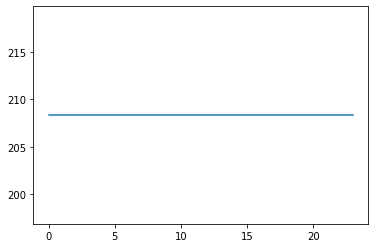

In [34]:
plt.plot(df_loantest['principle'])

In [71]:
type(2.2)



float

In [6]:
df_loan_fixed=loan_analysis(amount=400000, first_date=np.datetime64('2020-02-01'), loan_period =360 ,fixed_period=30*12,
                  fixed_interest=2.38, var_base_interest=0, var_interest=0)
df_loan_fixed4d5=loan_analysis(amount=400000, first_date=np.datetime64('2020-02-01'), loan_period =360 ,fixed_period=30*12,
                  fixed_interest=4.5, var_base_interest=0, var_interest=0)

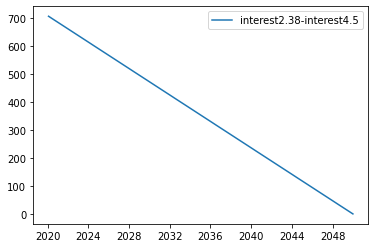

In [10]:
plt.plot(df_loan_fixed4d5['interest_payment']-df_loan_fixed['interest_payment'],label='interest2.38-interest4.5')
plt.legend()

In [9]:
(df_loan_fixed4d5['interest_payment']-df_loan_fixed['interest_payment']).sum()


127553.33333333394